### Bidiretional LSTM for Time Series Forecasting

Libs required:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense, LSTM, Bidirectional

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,4)

Using TensorFlow backend.


In [2]:
et0_train = pd.read_csv('./data/label_train.csv')
et0_val = pd.read_csv('./data/label_val.csv')

et0_train_ = pd.read_csv('./data/label_train_.csv')
et0_test = pd.read_csv('./data/label_test.csv')

In [3]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
def overfitting_plot(history):
    loss = history.history['loss']
    
    epochs = range(1, len(loss) + 1)
    
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.legend(loc='best')

In [5]:
n_steps = 1
n_features = 1

features, label = split_sequence(et0_train_.values, n_steps)
features = features.reshape((features.shape[0], features.shape[1], n_features))

In [6]:
for i in range(0,5):
    print("{}, {}\n".format(features[i], label[i]))

[[6.95434295]], [9.08150375]

[[9.08150375]], [9.0281699]

[[9.0281699]], [7.93418562]

[[7.93418562]], [7.70423053]

[[7.70423053]], [5.19487979]



In [7]:
model = Sequential()
model.add(Bidirectional(LSTM(256,
                        input_shape=(n_steps, n_features))))
model.add(Dense(1))

In [8]:
model.compile(optimizer=Adam(lr=1e-3), 
              loss='mean_absolute_error', 
              metrics=['mae', 'mse'], )

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
history = model.fit(features,
                    label,
                    epochs=10, 
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
921/921 [==============================] - 2s 2ms/step - loss: 5.5014 - mean_absolute_error: 5.5014 - mean_squared_error: 36.1222
Epoch 2/10
921/921 [==============================] - 0s 319us/step - loss: 2.3123 - mean_absolute_error: 2.3123 - mean_squared_error: 8.0986
Epoch 3/10
921/921 [==============================] - 0s 329us/step - loss: 1.3546 - mean_absolute_error: 1.3546 - mean_squared_error: 3.0274
Epoch 4/10
921/921 [==============================] - 0s 350us/step - loss: 1.3263 - mean_absolute_error: 1.3263 - mean_squared_error: 2.8865
Epoch 5/10
921/921 [==============================] - 0s 339us/step - loss: 1.3239 - mean_absolute_error: 1.3239 - mean_squared_error: 2.8736
Epoch 6/10
921/921 [==============================] - 0s 328us/step - loss: 1.3234 - mean_absolute_error: 1.3234 - mean_squared_error: 2.8723
Epoch 7/10
921/921 [==============================] - 0s 340us/step - loss: 1.3234 - mean_absolute_er

In [10]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error'])

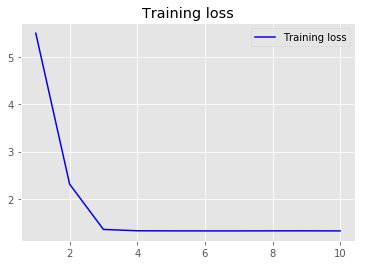

In [11]:
overfitting_plot(history)

In [12]:
features_test, label_test = split_sequence(et0_test.values, n_steps)
features_test = features_test.reshape((features_test.shape[0], features_test.shape[1], n_features))

In [13]:
model.evaluate(features_test, label_test)

230/230 [==============================] - 0s 1ms/step


[1.354848469858584, 1.354848469858584, 3.0221114884252134]

In [14]:
np.sqrt(3.0221114884252134)

1.7384221260744508